<a href="https://colab.research.google.com/github/Itsvi-ctor/Convolutional-Neural-Network/blob/main/Copy_of_Image_classificaation_cnn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [3]:
from PIL import Image
import numpy as np
import os

# Folder containing images UNHEALTHY
folder_path_unhealthy = 'drive/My Drive/Unhealthy_new'

# List all image files in the folder
image_files_unhealthy = [os.path.join(folder_path_unhealthy, file) for file in os.listdir(folder_path_unhealthy) if file.endswith(('png', 'jpg', 'jpeg'))]

# Load images into a NumPy array
image_array_unhealthy = np.array([np.array(Image.open(file)) for file in image_files_unhealthy])
image_array_unhealthy = image_array_unhealthy/255.0
image_array_unhealthy.shape

(99, 600, 1200, 4)

In [4]:
# Folder containing images HEALTHY
folder_path_healthy = 'drive/My Drive/Healthy_new'

# List all image files in the folder
image_files_unhealthy = [os.path.join(folder_path_healthy, file) for file in os.listdir(folder_path_healthy) if file.endswith(('png', 'jpg', 'jpeg'))]

# Load images into a NumPy array
image_array_healthy = np.array([np.array(Image.open(file)) for file in image_files_unhealthy])
image_array_healthy = image_array_healthy/255.0
image_array_healthy.shape

(99, 600, 1200, 4)

In [5]:
# Folder containing images UNHEALTHY TEST
folder_path_unhealthy_test = 'drive/My Drive/Unhealthy_test'

# List all image files in the folder
image_files_unhealthy = [os.path.join(folder_path_unhealthy_test, file) for file in os.listdir(folder_path_unhealthy_test) if file.endswith(('png', 'jpg', 'jpeg'))]

# Load images into a NumPy array
image_array_unhealthy_test = np.array([np.array(Image.open(file)) for file in image_files_unhealthy])
image_array_unhealthy_test.shape

(18, 600, 1200, 4)

In [6]:
# Folder containing images HEALTHY TEST
folder_path_healthy_test = 'drive/My Drive/Healthy_test'

# List all image files in the folder
image_files_healthy_test = [os.path.join(folder_path_healthy_test, file) for file in os.listdir(folder_path_healthy_test) if file.endswith(('png', 'jpg', 'jpeg'))]

# Load images into a NumPy array
image_array_healthy_test = np.array([np.array(Image.open(file)) for file in image_files_healthy_test])
image_array_healthy_test.shape

(18, 600, 1200, 4)

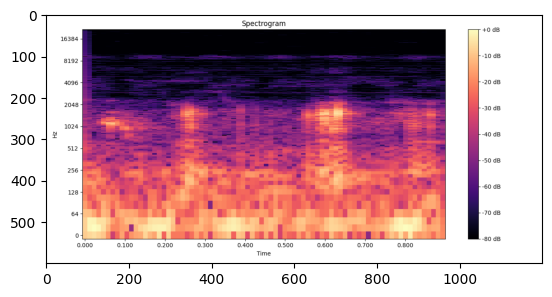

In [7]:
idx = random.randint(0, len(image_array_unhealthy_test))
plt.imshow(image_array_unhealthy_test[idx, :])
plt.show()

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (600, 1200, 4)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (600, 1200, 4)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

# Assuming you have a model created
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(600, 1200, 4)))
# Add other layers...

# Output layer for binary classification
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  # One unit for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
# Assuming image_array_healthy and image_array_unhealthy are correctly prepared and loaded

# Convert to float32 and reshape the input data
image_array_healthy = np.asarray(image_array_healthy).astype('float32').reshape((-1, 600, 1200, 4))
image_array_unhealthy = np.asarray(image_array_unhealthy).astype('float32').reshape((-1, 600, 1200, 4))

# Assuming labels are encoded (0 for unhealthy, 1 for healthy)
# Ensure labels are shaped accordingly
labels_healthy = np.ones((len(image_array_healthy), 1))  # Assuming healthy is labeled as 1
labels_unhealthy = np.zeros((len(image_array_unhealthy), 1))  # Assuming unhealthy is labeled as 0

# Combine labels for both healthy and unhealthy data
labels_combined = np.vstack((labels_unhealthy, labels_healthy))

# Train the model
model.fit(np.vstack((image_array_unhealthy, image_array_healthy)), labels_combined, epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(np.vstack((image_array_unhealthy, image_array_healthy)), labels_combined, verbose=2)
print('Loss:', loss)
print('Accuracy:', accuracy)


Epoch 1/5
4/4 [==============================] - 27s 6s/step - loss: 55.7259 - accuracy: 0.5051
Epoch 2/5
4/4 [==============================] - 26s 6s/step - loss: 30.8869 - accuracy: 0.5000
Epoch 3/5
4/4 [==============================] - 26s 6s/step - loss: 11.0692 - accuracy: 0.5960
Epoch 4/5
4/4 [==============================] - 26s 6s/step - loss: 7.9699 - accuracy: 0.6667
Epoch 5/5
4/4 [==============================] - 26s 6s/step - loss: 6.6672 - accuracy: 0.6566
7/7 - 8s - loss: 0.6463 - accuracy: 0.9495 - 8s/epoch - 1s/step
Loss: 0.6462839841842651
Accuracy: 0.9494949579238892


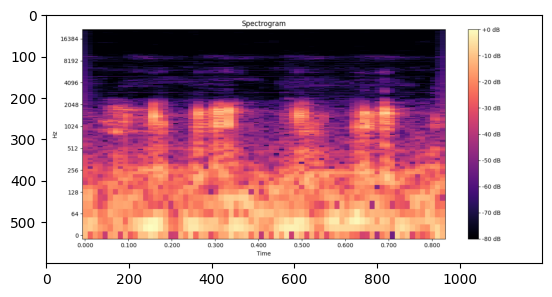

1/1 [==============================] - 0s 93ms/step
Our model says it is : healthy


In [23]:
idx2 = random.randint(0, len(image_array_healthy_test))
plt.imshow(image_array_unhealthy_test[idx2, :])
plt.show()

y_pred = model.predict(image_array_unhealthy_test[idx2, :].reshape(1, 600, 1200, 4))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'healthy'
else:
    pred = 'unhealthy'

print("Our model says it is :", pred)